Omar Osman, Marc Pomeroy, & Elisabeth Steadman 

(1) Given a true model of $f(x_i,\theta)$, we can compute the likelihood function $P(Data | Model)=P[y_i | f(x_i,\theta)]$ if the error follows a bimodal normal distribution.  If each peak is centered at  $f(x_i,\theta) \pm \Delta y$ with width $\sigma$, we can write the probability of finding a data point $y_i$ given each of the peaks. Then,

$P(y_i|left)=\frac{1}{\sqrt{2 \pi \sigma^2}}exp \lbrack \frac{-(y_i-f(x_i,\theta)+\Delta y)^2}{2 \sigma^2} \rbrack$

$P(y_i|right)=\frac{1}{\sqrt{2 \pi \sigma^2}}exp \lbrack \frac{-(y_i-f(x_i,\theta)-\Delta y)^2}{2 \sigma^2} \rbrack$

Since the probability of choosing each peak is the same, $P(left)=P(right)=1/2$. Then we can write the probability of finding a data point $y_i$ given $f(x_i,\theta)$ as:

$P(y_i|f(x_i,\theta))=P(y_i|left) P(left) + P(y_i|right) P(right)$

$P(y_i|f(x_i,\theta)) = \frac{1}{2\sqrt{2\pi\sigma^2}} \Big\{ exp \big\lbrack \frac{-(y_i-f(x_i,\theta)+\Delta y)^2}{2 \sigma^2} \big\rbrack + exp \big\lbrack \frac{-(y_i-f(x_i,\theta)-\Delta y)^2}{2 \sigma^2} \big\rbrack \Big\}$

The likelihood function is therefore the product of the probabilities for each individual data point $y_i$ in the set of N datapoints $\{ y_i \}$:

$P(\{y_i\}|f(\{x_i\},\theta))=\prod\limits_{i=1}^{N}P(y_i|f(x_i,\theta))$

$P(\{y_i\}|f(\{x_i\},\theta))=\prod\limits_{i=1}^{N} \frac{1}{2\sqrt{2\pi\sigma^2}} \Big\{ exp \big\lbrack \frac{-(y_i-f(x_i,\theta)+\Delta y)^2}{2 \sigma^2} \big\rbrack + exp \big\lbrack \frac{-(y_i-f(x_i,\theta)-\Delta y)^2}{2 \sigma^2} \big\rbrack \Big\}$

Or, we can write simplify this using the hyperbolic cosine function:

$P(\{y_i\}|f(\{x_i\},\theta))=\prod\limits_{i=1}^{N} \frac{1}{2\sqrt{2\pi\sigma^2}} exp \big\lbrack  \frac{-\lbrack (y_i-a-bx_i)^2+\Delta y^2 \rbrack}{2\sigma^2}  \big\rbrack  \Big\{ exp \big\lbrack \frac{\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack + exp \big\lbrack \frac{-\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack \Big\}$

$P(\{y_i\}|f(\{x_i\},\theta))=\prod\limits_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} exp \big\lbrack  \frac{-\lbrack (y_i-a-bx_i)^2+\Delta y^2 \rbrack}{2\sigma^2}  \big\rbrack cosh \big\lbrack \frac{\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack $

(2) First, we develop a function to randomly generate errors drawn from a bimodal distribution, with peaks at $\pm \Delta y$ 

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import chi2
import scipy.optimize as sciop

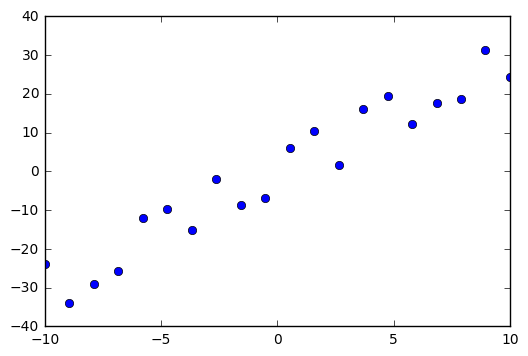

In [33]:
#generating a data set with bimodal error
N=20
x=np.linspace(-10,10,N)
delta_y=5
sigma=1
def dataset(N):
    for i in range(N):
        choose_dist=np.random.randint(0,2,N)
        error=np.where(choose_dist,np.random.normal(-delta_y,sigma,N),np.random.normal(delta_y,sigma,N))
        y=3*x+error
    return y
y=dataset(N)
plt.plot(x,y,'o')

In order to simplify the computation, we take the negative log of likelihood function. Since the logarithm is monotonically increasing, the minimum of the negative log likelihood has the same parameters as the maximum of the original likelihood function.

$-log \big\lbrack P(\{y_i\}|f(\{x_i\},\theta))\big\rbrack =-log \Big\{  \prod\limits_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} exp \big\lbrack  \frac{-\lbrack (y_i-a-bx_i)^2+\Delta y^2 \rbrack}{2\sigma^2}  \big\rbrack cosh \big\lbrack \frac{\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack \Big\} $

$-log \big\lbrack P(\{y_i\}|f(\{x_i\},\theta))\big\rbrack =-log \big\lbrack\frac{1}{\sqrt{2\pi\sigma^2}}\big\rbrack - \sum \limits_{i=1}^{N} \frac{-\lbrack (y_i-a-bx_i)^2+\Delta y^2 \rbrack}{2\sigma^2}-\sum \limits_{i=1}^{N} log \big\{ cosh \big\lbrack \frac{\Delta y (y_i-a-bx_i)}{\sigma^2}  \big\rbrack \big\}$

The minimum of this function occurs where the derivatives with respect to each parameter a, b, and $\Delta y$ are zero. The partial derivatives are then:

$\frac{d}{da} \Big\{ -log \big\lbrack P(\{y_i\}|f(\{x_i\},\theta))\big\rbrack \Big\} = -\sum \limits_{i=1}^{N} \Big\{ \frac{y_i-a-bx_i}{\sigma^2} - (\Delta y) tanh \big\lbrack \frac{\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack \Big\}=0$

$\frac{d}{db} \Big\{ -log \big\lbrack P(\{y_i\}|f(\{x_i\},\theta))\big\rbrack \Big\} = -\sum \limits_{i=1}^{N}  \Big\{ \frac{x_i(y_i-a-bx_i)}{\sigma^2} -(x_i \Delta y) tanh \big\lbrack \frac{\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack \Big\}=0$

$\frac{d}{d\Delta y} \Big\{ -log \big\lbrack P(\{y_i\}|f(\{x_i\},\theta))\big\rbrack \Big\} = -\sum \limits_{i=1}^{N}  \Big\{  \frac{-\Delta y}{\sigma^2} + (y_i-a-bx_i) tanh \big\lbrack \frac{\Delta y(y_i-a-bx_i)}{\sigma^2} \big\rbrack \Big\}=0$

To solve this we use the scipy.optimize.root function to find the roots of the Jacobian, which give us the parameters a and b of our best fit line.

In [34]:
#Generate function for negative log likelihood
def neg_log_likelihood(theta,x,y):   #theta = [a,b,delta_y]
    left_peak=np.exp((-1)*np.power(y-theta[0]-theta[1]*x+theta[2],2)/(2*sigma**2))
    right_peak=np.exp((-1)*np.power(y-theta[0]-theta[1]*x-theta[2],2)/(2*sigma**2))
    Prob_i=(-1)*np.log(1/(2*np.sqrt(2*np.pi*sigma**2))*(left_peak+right_peak))
    Prob_all=Prob_i.sum()
    return Prob_all

print(neg_log_likelihood([1,2,3],x,y))

369.532408816


In [35]:
#Generate functions for partial derivatives of negative log likelihood
def jacobian2(theta,x,y,delta_y):  #we know delta_y
    tanh = np.tanh(delta_y*(y-theta[0]-theta[1]*x)/sigma**2)
    da = (y-theta[0]-theta[1]*x)/sigma**2 - delta_y*tanh
    db = x*(y-theta[0]-theta[1]*x)/sigma**2 - x*delta_y*tanh
    return np.array([da.sum(),db.sum()],)

def jacobian3(theta,x,y):  #delta_y is a parameter
    tanh = np.tanh(theta[2]*(y-theta[0]-theta[1]*x)/sigma**2)
    da = (y-theta[0]-theta[1]*x)/sigma**2 - theta[2]*tanh
    db = x*(y-theta[0]-theta[1]*x)/sigma**2 - x*theta[2]*tanh
    ddy = da = -1*theta[2]/sigma**2 - (y-theta[0]-theta[1]*x)*tanh
    return np.array([da.sum(),db.sum(),ddy.sum()],)

In [36]:
res=sciop.root(jacobian2,x0=[0.0,0.0],args=(x,y,delta_y))
print(res)

    fjac: array([[-0.33950326,  0.94060488],
       [-0.94060488, -0.33950326]])
     fun: array([  8.88178420e-16,   1.35003120e-13])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([  2.61909237e-09,  -1.40206477e-09])
       r: array([  41.93080519, -882.29667151,  351.45621547])
  status: 1
 success: True
       x: array([ 0.04847297,  3.01457962])


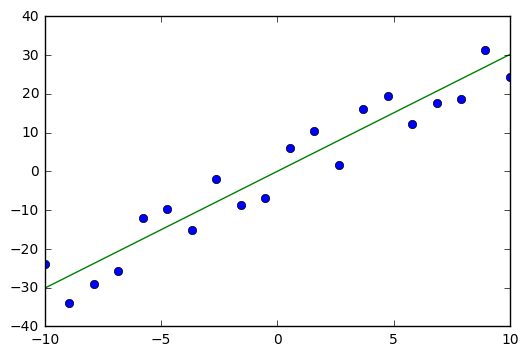

In [37]:
#Make pretty plot showing best fit line
[a,b]=res.x
points=plt.plot(x,y,'o')
best_fit=plt.plot(x,(a+b*x))

(3) To instead fit the data to two parallel lines of intercept a, slope b, and separation 2$\Delta y$, we first develop a method to separate the data points into two groups associated with each peak. This is done by using a linear polynomial fit of the entire data set, and comparing each point against that line (either above of below). Once we have the groups of data points, we again use the linear polynomial fit on each to generate a slope and intercept. We then generate the two equations for the lines as follows:

$y_{below} = a+bx-\Delta y$

$y_{above} = a+bx+\Delta y$

Where $a=\frac{a_{above}+a_{below}}{2}$, $b=\frac{b_{above}+b_{below}}{2}$, and $\Delta y =\frac{|b_{above}-b_{below}|}{2}$

We then compute $\chi^2$ by adding the square of the residuals for each data set:

$\chi^2=\sum\limits_{i=1}^{N_{below}} (y_i-y_{below})^2 + \sum\limits_{i=1}^{N_{above}} (y_i-y_{above})^2=\sum\limits_{i=1}^{N_{below}} (y_i-a-bx_i+\Delta y)^2 + \sum\limits_{i=1}^{N_{above}} (y_i--a-bx_i-\Delta y)^2$

We then generate a $\chi^2$ probability distribution function with a peak at N-3, since there are 3 parameters used, and compare this to a histogram plot of the $\chi^2$ values

In [38]:
#Separate data based on single best fit line
def separate(x,y,a,b):
    fit_line = a+b*x
    is_above = y >= fit_line
    x_above = x[is_above]
    y_above = y[is_above]
    x_below = x[np.logical_not(is_above)]
    y_below = y[np.logical_not(is_above)]
    return (x_above, y_above, x_below, y_below)

In [39]:
chisq_list_pf = []
for i in range(1000):
    y_pf = dataset(N)
    b,a = np.polyfit(x, y_pf, 1)
    [x_above,y_above,x_below,y_below]=separate(x,y_pf,a,b)
    p_above = np.polyfit(x_above,y_above,1)
    p_below = np.polyfit(x_below,y_below,1)
    b = (p_above[0] + p_below[0])/2
    a = (p_above[1] + p_below[1])/2
    delta_y_pf = np.abs((p_above[1]-p_below[1])/2)
    res_above_pf = a+b*x_above+delta_y_pf
    res_below_pf = a+b*x_below-delta_y_pf
    chi2_pf = np.sum((y_above - res_above_pf)**2) + np.sum((y_below - res_below_pf)**2)
    chisq_list_pf.append(chi2_pf)

In [40]:
#Generate chi2 pdf for N-3 points
chi=np.linspace(0,60,200)
chi2distr=chi2.pdf(chi,N-3)

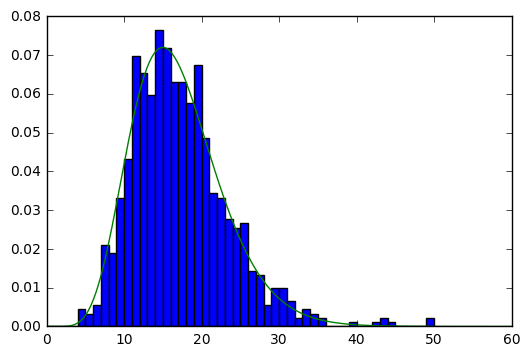

In [41]:
#Compare histogram w/ chi2 pdf
plt.hist(chisq_list_pf,range=(0,50),bins=50,normed=True)
plt.plot(chi,chi2distr)

(BONUS!)

The full Bayesian expression is given (simply) by:

$P(M|D)=\frac{P(D|M)P(M)}{P(D)}=\frac{P(D|M)P(M)}{\sum\limits_{j} P(D|M_j)P(M_j)}$

Where P(D|M) is given by our likelihood function, or 

$P(D|M)=P(\{y_i\}|f(\{x_i\},\theta))=\prod\limits_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} exp \big\lbrack  \frac{-\lbrack (y_i-f(x_i,\theta))^2+\Delta y^2 \rbrack}{2\sigma^2}  \big\rbrack cosh \big\lbrack \frac{\Delta y(y_i-f(x_i,\theta))}{\sigma^2} \big\rbrack$

P(M) is the prior, which gives the probability of the model function being correct. If we assume all functions are equally likely, we have a uniform, improper prior which we set equal to 1. Or,

$P(M)=P[f(\{x_i\},\theta)]=1$

The denominator term is given by:

$P(D)=\sum\limits_{j} P(D|M_j)P(M_j)=\sum\limits_{j} P(D|M_j)$ since $P(M_j)=1$

Then our final expression is given by:

$P(M|D)=\frac{P(D|M)}{\sum\limits_{j} P(D|M_j)}=\frac{\prod\limits_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} exp \big\lbrack  \frac{-\lbrack (y_i-f(x_i,\theta))^2+\Delta y^2 \rbrack}{2\sigma^2}  \big\rbrack cosh \big\lbrack \frac{\Delta y(y_i-f(x_i,\theta))}{\sigma^2} \big\rbrack}{\sum\limits_{j} \prod\limits_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} exp \big\lbrack  \frac{-\lbrack (y_i-f_j(x_i,\theta))^2+\Delta y^2 \rbrack}{2\sigma^2}  \big\rbrack cosh \big\lbrack \frac{\Delta y(y_i-f_j(x_i,\theta))}{\sigma^2} \big\rbrack}$

where $f(x_i,\theta)=a+bx_i$ is our linear function, and $f_j(x_i,\theta)$ represents all other possible functions